In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('census_income_2019.csv', index_col= 0 )

C:\Users\edwar\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head()

,PWGTP,WGTP,PINCP,WKHP,WAGP,AGEP,FER,DIS,COW,CPLT,ADJINC,CIT,POBP,PARTNER,SEX,RAC1P,SCHL,OCCP,NAICSP,SERIALNO,SPORDER,WAOB
1,71,0,63000,80,63000,35,0,2,1,0,1.010145,1,18,-1,1,1,17,6250,23,2019GQ0000001,1,1
2,67,0,0,0,0,25,0,2,0,0,1.010145,1,48,-1,1,1,12,9,-1,2019GQ0000004,1,1
3,24,0,2000,15,2000,21,2,2,2,0,1.010145,5,229,-1,2,6,19,4740,611M1,2019GQ0000007,1,4
4,52,0,0,0,0,49,0,2,1,0,1.010145,1,6,-1,1,1,21,110,722Z,2019GQ0000010,1,1
5,28,0,6000,15,6000,18,2,2,1,0,1.010145,1,6,-1,2,1,16,4110,722Z,2019GQ0000013,1,1


In [4]:
df.shape

(3239553, 22)

In [5]:
df.dtypes

PWGTP         int64
WGTP          int64
PINCP         int64
WKHP          int64
WAGP          int64
AGEP          int64
FER           int64
DIS           int64
COW           int64
CPLT          int64
ADJINC      float64
CIT           int64
POBP          int64
PARTNER       int64
SEX           int64
RAC1P         int64
SCHL          int64
OCCP          int64
NAICSP       object
SERIALNO     object
SPORDER       int64
WAOB          int64
dtype: object

In [6]:
org_vars = """PINCP
WAGP
INTP
ADJINC
PWGTP
OCCP
NAICSP
WKHP
AGEP
SEX
FER
CPLT
PARTNER
COW
RAC1P
POBP
CIT
SCHL
DIS
SERIALNO
SPORDER
WAOB""".split("\n")

In [7]:
uptd_vars = """INCOME
SALARY
INTEREST_DIV
ADJINC
FNLWGT
OCCUPATION
WORK_INDUSTRY
WKLY_HRS
AGE
SEX
MOM
COUPLE
PARTNER
WORK_CLASS
RACE
POB_DETAIL
CITIZENSHIP
EDUCATION
DIS
SERIALNO
PERSON_NO
POB_WORLD""".split("\n")

In [8]:
vars_dict = dict(zip(org_vars, uptd_vars))

In [9]:
vars_dict

{'PINCP': 'INCOME',
 'WAGP': 'SALARY',
 'INTP': 'INTEREST_DIV',
 'ADJINC': 'ADJINC',
 'PWGTP': 'FNLWGT',
 'OCCP': 'OCCUPATION',
 'NAICSP': 'WORK_INDUSTRY',
 'WKHP': 'WKLY_HRS',
 'AGEP': 'AGE',
 'SEX': 'SEX',
 'FER': 'MOM',
 'CPLT': 'COUPLE',
 'PARTNER': 'PARTNER',
 'COW': 'WORK_CLASS',
 'RAC1P': 'RACE',
 'POBP': 'POB_DETAIL',
 'CIT': 'CITIZENSHIP',
 'SCHL': 'EDUCATION',
 'DIS': 'DIS',
 'SERIALNO': 'SERIALNO',
 'SPORDER': 'PERSON_NO',
 'WAOB': 'POB_WORLD'}

In [10]:
df = df.rename(columns=vars_dict)

In [11]:
df.head()

,FNLWGT,WGTP,INCOME,WKLY_HRS,SALARY,AGE,MOM,DIS,WORK_CLASS,COUPLE,ADJINC,CITIZENSHIP,POB_DETAIL,PARTNER,SEX,RACE,EDUCATION,OCCUPATION,WORK_INDUSTRY,SERIALNO,PERSON_NO,POB_WORLD
1,71,0,63000,80,63000,35,0,2,1,0,1.010145,1,18,-1,1,1,17,6250,23,2019GQ0000001,1,1
2,67,0,0,0,0,25,0,2,0,0,1.010145,1,48,-1,1,1,12,9,-1,2019GQ0000004,1,1
3,24,0,2000,15,2000,21,2,2,2,0,1.010145,5,229,-1,2,6,19,4740,611M1,2019GQ0000007,1,4
4,52,0,0,0,0,49,0,2,1,0,1.010145,1,6,-1,1,1,21,110,722Z,2019GQ0000010,1,1
5,28,0,6000,15,6000,18,2,2,1,0,1.010145,1,6,-1,2,1,16,4110,722Z,2019GQ0000013,1,1


In [12]:
df.duplicated().sum()

0

In [13]:
# narrow down data to adults over the 17 years old
df = df[df.AGE > 17]

In [14]:
df.shape

(2599171, 22)

In [15]:
# narrow down data to adults who worked in the past 12 months
df = df[df.WKLY_HRS > 0]

In [16]:
df.shape

(1659727, 22)

In [17]:
df.describe()

,FNLWGT,WGTP,INCOME,WKLY_HRS,SALARY,AGE,MOM,DIS,WORK_CLASS,COUPLE,ADJINC,CITIZENSHIP,POB_DETAIL,PARTNER,SEX,RACE,EDUCATION,OCCUPATION,PERSON_NO,POB_WORLD
count,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06
mean,1.033513e+02,9.579058e+01,6.058823e+04,3.839128e+01,5.189937e+04,4.390527e+01,5.906477e-01,1.928990e+00,2.103359e+00,8.639788e-01,1.010145e+00,1.519284e+00,6.538772e+01,2.079902e-01,1.478681e+00,1.873518e+00,1.871658e+01,4.088068e+03,1.676787e+00,1.451513e+00
std,9.061065e+01,8.493126e+01,7.691692e+04,1.310493e+01,6.724644e+04,1.525340e+01,9.042176e-01,2.568414e-01,1.827131e+00,8.056928e-01,3.338952e-11,1.227446e+00,9.273321e+01,8.872759e-01,4.995454e-01,2.079837e+00,3.274921e+00,2.685733e+03,9.803672e-01,1.123796e+00
min,1.000000e+00,0.000000e+00,-1.020000e+04,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.010145e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00
25%,5.100000e+01,4.800000e+01,2.100000e+04,3.500000e+01,1.450000e+04,3.100000e+01,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.010145e+00,1.000000e+00,1.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.600000e+01,2.040000e+03,1.000000e+00,1.000000e+00
50%,7.900000e+01,7.400000e+01,4.024000e+04,4.000000e+01,3.540000e+04,4.400000e+01,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.010145e+00,1.000000e+00,3.600000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.900000e+01,4.110000e+03,1.000000e+00,1.000000e+00
75%,1.230000e+02,1.160000e+02,7.200000e+04,4.200000e+01,6.500000e+04,5.600000e+01,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.010145e+00,1.000000e+00,4.800000e+01,0.000000e+00,2.000000e+00,1.000000e+00,2.100000e+01,5.740000e+03,2.000000e+00,1.000000e+00
max,2.408000e+03,2.377000e+03,1.629000e+06,9.900000e+01,7.170000e+05,9.600000e+01,2.000000e+00,2.000000e+00,8.000000e+00,4.000000e+00,1.010145e+00,5.000000e+00,5.540000e+02,4.000000e+00,2.000000e+00,9.000000e+00,2.400000e+01,9.830000e+03,2.000000e+01,8.000000e+00


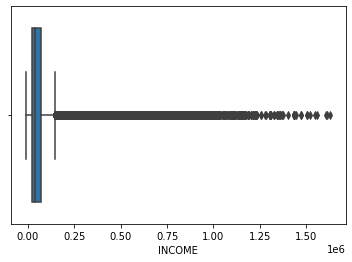

In [18]:
sns.boxplot(x=df.INCOME)


In [19]:
df.INCOME.describe()

count    1.659727e+06
mean     6.058823e+04
std      7.691692e+04
min     -1.020000e+04
25%      2.100000e+04
50%      4.024000e+04
75%      7.200000e+04
max      1.629000e+06
Name: INCOME, dtype: float64

In [20]:
df.INCOME

1           63000
3            2000
5            6000
12           3200
14            500
            ...  
3239549    150000
3239550     27000
3239551     75000
3239552     57000
3239553     55000
Name: INCOME, Length: 1659727, dtype: int64

In [21]:
df[df.INCOME > 100]['INCOME'].describe()

count    1.656282e+06
mean     6.071761e+04
std      7.694438e+04
min      1.040000e+02
25%      2.100000e+04
50%      4.050000e+04
75%      7.200000e+04
max      1.629000e+06
Name: INCOME, dtype: float64

In [22]:
df.SALARY.describe()

count    1.659727e+06
mean     5.189937e+04
std      6.724644e+04
min      0.000000e+00
25%      1.450000e+04
50%      3.540000e+04
75%      6.500000e+04
max      7.170000e+05
Name: SALARY, dtype: float64

In [23]:
df.EDUCATION.value_counts()

21    378817
16    342093
19    250254
22    166793
20    154487
18    120758
17     56487
23     42571
24     29033
15     26173
14     23779
1      15897
13     15039
12     12130
9       8507
11      8136
10      2418
8       1794
6       1670
7       1112
5        797
4        423
2        298
3        261
Name: EDUCATION, dtype: int64

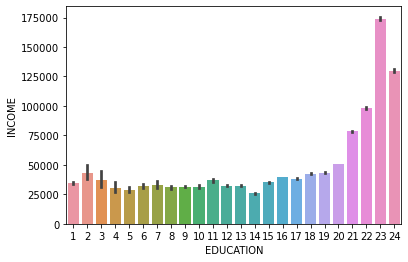

In [24]:
sns.barplot(data=df, x='EDUCATION', y='INCOME')

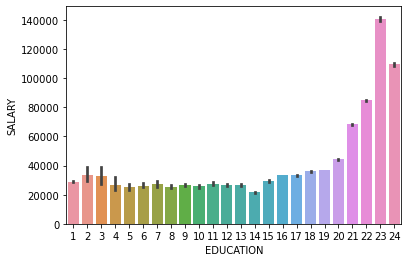

In [25]:
sns.barplot(data=df, x='EDUCATION', y='SALARY')

In [26]:
df['TARGET_60'] = np.where(df.INCOME >= 60000, 'Over_60k', 'Under_60k')

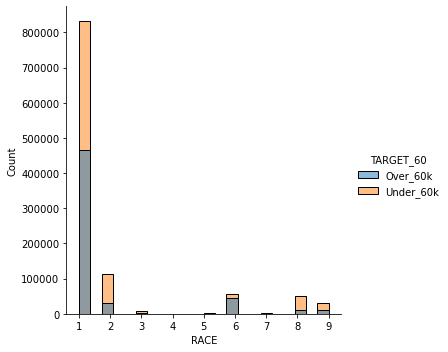

In [27]:
sns.displot(data = df, x="RACE", hue = "TARGET_60")

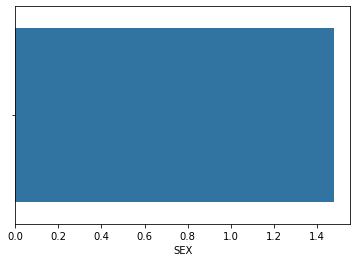

In [28]:
sns.barplot(data = df, x="SEX", hue = "TARGET_60")
plt.show()

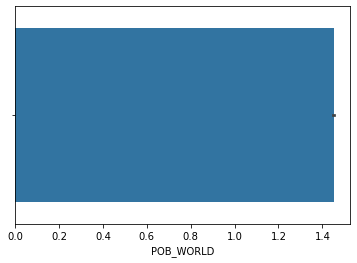

In [29]:
sns.barplot(data = df, x="POB_WORLD", hue = "TARGET_60")

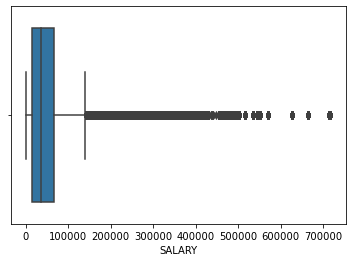

In [30]:
sns.boxplot(x=df.SALARY)


In [31]:
df.INCOME.median()

40240.0

In [32]:
df.SALARY.median()

35400.0